## Tumor primario (T)

 TX: no es posible medir el tumor primario.
 
 T0: No es posible encontrar el tumor primario.
 
 T1, T2, T3, T4: la T indica el tamaño o la extensión del tumor.

### Ganglios linfáticos regionales (N)

NX: no es posible medir el cáncer en los ganglios linfáticos cercanos.

N0: no hay cáncer en los ganglios linfáticos cercanos.

N1, N2, N3: indican el número y la ubicación de los ganglios linfáticos cancerosos. Mientras más alto es el número que sigue a la N, más alta es la cantidad de ganglios linfáticos cancerosos.

### Metástasis distante (M)

MX: no es posible medir la metástasis.

M0: el cáncer no se diseminó a otras partes del cuerpo.

M1: el cáncer se diseminó a otras partes del cuerpo.

In [1]:
import numpy as np
import math
import operator
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
#style.use('dark_background')
style.use('ggplot')

historia_df = pd.read_excel('Historia_pacientes.xlsx', header=51)
codigo_paciente_df = pd.read_excel('Excel 2 - Código paciente FJD.xlsx')
### cuando se actualice 'Excel 2 - Código paciente FJD.xlsx' --> 'Historia_pacientes_FJD.xlsx'
### idem cuando tenga 'Código paciente HRyC.xlsx'

C:\Users\juanm\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#historia_df.dtypes
#data.head()
#print(historia_df[:20])

In [3]:
historia_df.columns

Index(['CODIGO PACIENTE', 'FECHA NAC', 'GENERO', 'MEDICO',
       'ANTECEDENTES FAMILIARES', 'CODIGO MUESTRA', 'FECHA MUESTRA',
       'ULTIMO SEGUIMIENTO', 'ESTADO', 'ESTADIO AL DX',
       ...
       'C3 2L POST', 'BIOL 2L', 'INICIO BIOL 2L', 'FINAL BIOL 2L',
       'CONCENTRACIÓN BIOL 2L', 'TOXICIDAD 2L', 'FECHA TOXICIDAD 2L',
       'REDUCCION DOSIS 2L', 'FECHA REDUCCION DOSIS 2L', 'EC2L'],
      dtype='object', length=136)

In [4]:
selected_columns = historia_df[['CODIGO MUESTRA', 'FECHA NAC', 'ESTADIO AL DX', 'LOC PRIMARIO', 'GRADO DIF', 'T', 'N', 'M',
                                'TTO LOCORREGIONAL EL', 'QT EL PRE', 'QT EL POST', 'QT 1L PRE', 'QT 1L POST', 'TOXICIDAD EL', 'TOXICIDAD 1L']]
#print(historia_df.index.values)
historia2_df= selected_columns.copy()
#print(historia2_df.index.values)

In [5]:
historia2_df=selected_columns.set_index('CODIGO MUESTRA')
historia2_df.rename(columns={'TTO LOCORREGIONAL EL':'TTO EL'}, inplace=True)
historia2_df.head(10)
#print(historia2_df.index.values)

,FECHA NAC,ESTADIO AL DX,LOC PRIMARIO,GRADO DIF,T,N,M,TTO EL,QT EL PRE,QT EL POST,QT 1L PRE,QT 1L POST,TOXICIDAD EL,TOXICIDAD 1L
CODIGO MUESTRA,,,,,,,,,,,,,,
HJD0001,1955-07-31,III,Recto,Moderadamente diferenciado,T3,N1,M0,QTRT sola,NaN,NaN,NaN,NaN,No,NaN
HJD0002,1943-08-11,III,Colon ascendente,Moderadamente diferenciado,T3,N1,M0,Cx y QT post,NaN,NaN,NaN,NaN,No,NaN
HJD0003,1960-03-11,I,Colon transverso,Bien diferenciado,T1,N0,M0,Cx sola,NaN,NaN,NaN,NaN,No,NaN
HJD0004,1954-09-27,I,Colon descendente,Moderadamente diferenciado,T2,N0,M0,Cx sola,NaN,NaN,NaN,NaN,No,NaN
HJD0005,1965-01-25,IV,Colon descendente,Moderadamente diferenciado,TX,NX,M1,Ninguno,NaN,NaN,NaN,NaN,No,NaN
HJD0006,1976-03-07,II,Colon descendente,Moderadamente diferenciado,T3,N0,M0,Cx y QT post,NaN,Capecitabina / 5FU,NaN,NaN,No,NaN
HJD0007,1951-12-24,IV,Recto,Moderadamente diferenciado,TX,NX,M1,QT sola,FOLFOX / CapeOx,NaN,NaN,NaN,No,NaN
HJD0008,1943-12-15,III,Colon descendente,Bien diferenciado,T3,N2,M0,Cx y QT post,NaN,FOLFOX / CapeOx,NaN,NaN,No,No
HJD0009,1947-07-01,III,Colon ascendente,Bien diferenciado,T4,N1,M0,Cx y QT post,NaN,FOLFOX / CapeOx,NaN,NaN,No,NaN


In [6]:
historia2_df.loc[historia2_df['QT EL PRE']=='FOLFOX / CapeOx', 'QT EL PRE']= 'oxaliplatino'
historia2_df.loc[historia2_df['QT EL POST']=='FOLFOX / CapeOx', 'QT EL POST']= 'oxaliplatino'
historia2_df.loc[historia2_df['QT 1L PRE']=='FOLFOX / CapeOx', 'QT 1L PRE']= 'oxaliplatino'
historia2_df.loc[historia2_df['QT 1L POST']=='FOLFOX / CapeOx', 'QT 1L POST']= 'oxaliplatino'

In [7]:
historia2_df.columns

Index(['FECHA NAC', 'ESTADIO AL DX', 'LOC PRIMARIO', 'GRADO DIF', 'T', 'N',
       'M', 'TTO EL', 'QT EL PRE', 'QT EL POST', 'QT 1L PRE', 'QT 1L POST',
       'TOXICIDAD EL', 'TOXICIDAD 1L'],
      dtype='object')

In [8]:
now = pd.Timestamp('01-01-2023')

if 'EDAD' not in historia2_df.columns:
    historia2_df['FECHA NAC'] = pd.to_datetime(historia2_df['FECHA NAC'], format='%m%d%y')    # 1
    #historia2_df['FECHA_NAC'] = historia2_df['FECHA_NAC'].where(historia2_df['FECHA_NAC'] < now, historia2_df['FECHA'] -  np.timedelta64(100, 'Y'))   # 2
    historia2_df['EDAD'] = (now - historia2_df['FECHA NAC']).astype('timedelta64[Y]').astype('int64')    # 3
    historia2_df.drop('FECHA NAC', inplace=True, axis=1)

In [9]:
historia2_df.head(10)

,ESTADIO AL DX,LOC PRIMARIO,GRADO DIF,T,N,M,TTO EL,QT EL PRE,QT EL POST,QT 1L PRE,QT 1L POST,TOXICIDAD EL,TOXICIDAD 1L,EDAD
CODIGO MUESTRA,,,,,,,,,,,,,,
HJD0001,III,Recto,Moderadamente diferenciado,T3,N1,M0,QTRT sola,NaN,NaN,NaN,NaN,No,NaN,67
HJD0002,III,Colon ascendente,Moderadamente diferenciado,T3,N1,M0,Cx y QT post,NaN,NaN,NaN,NaN,No,NaN,79
HJD0003,I,Colon transverso,Bien diferenciado,T1,N0,M0,Cx sola,NaN,NaN,NaN,NaN,No,NaN,62
HJD0004,I,Colon descendente,Moderadamente diferenciado,T2,N0,M0,Cx sola,NaN,NaN,NaN,NaN,No,NaN,68
HJD0005,IV,Colon descendente,Moderadamente diferenciado,TX,NX,M1,Ninguno,NaN,NaN,NaN,NaN,No,NaN,57
HJD0006,II,Colon descendente,Moderadamente diferenciado,T3,N0,M0,Cx y QT post,NaN,Capecitabina / 5FU,NaN,NaN,No,NaN,46
HJD0007,IV,Recto,Moderadamente diferenciado,TX,NX,M1,QT sola,oxaliplatino,NaN,NaN,NaN,No,NaN,71
HJD0008,III,Colon descendente,Bien diferenciado,T3,N2,M0,Cx y QT post,NaN,oxaliplatino,NaN,NaN,No,No,79
HJD0009,III,Colon ascendente,Bien diferenciado,T4,N1,M0,Cx y QT post,NaN,oxaliplatino,NaN,NaN,No,NaN,75


In [10]:
### Crea una fila por cada MUESTRA

### Leo un archivo paraa sacar los nombres de las columnas
patient_db_df = pd.read_excel('paciente_HJDP0001_BD.xlsx', header=0)
cols_db = list(patient_db_df.columns)
#print(cols_db)
cols = list(historia2_df.columns)
cols += cols_db

### creo un DataFrame vacío con las columnas de "paciente_XXX_BD.xlsx"
df2 = pd.DataFrame(columns=cols)
### Crea una fila por cada MUESTRA
i=0
muestras_list=list(historia2_df.index.values)
for muestra in muestras_list:
    print('muestra:',muestra)
    patient_sr = codigo_paciente_df.loc[codigo_paciente_df['CODIGO MUESTRA']== muestra, 'CODIGO PACIENTE']
    if len(patient_sr)>0:  ###algunas muestras no estaban en el archivo 2 de muestra--paciente
        patient_id = patient_sr.values[0]
        print('-- paciente:',patient_id)
    
        file_pat_db_xlsx = 'paciente_'+ patient_id + '_BD.xlsx'            

        if os.path.isfile(file_pat_db_xlsx):
            patient_db_df = pd.read_excel(file_pat_db_xlsx, header=0)
            print('leo el archivo de BD:',file_pat_db_xlsx)
        else:
            print('No existe el fichero:', file_pat_db_xlsx)
            patient_db_df = pd.DataFrame(columns=columns_tot)


        data1 = historia2_df.loc[muestra]
        #print(data1)
        db2_df = patient_db_df.loc[patient_db_df['id_muestra']==muestra]
        if len(db2_df)>0:
            data2 = db2_df.iloc[0]
            #print(data2)
#             data3=data1.append(data2, ignore_index= True)
            data3 = pd.concat([data1,data2], ignore_index=True)
            df2.loc[muestra,:]=list(data3)
    else:
        print('muestra no encontrada en base de datos\n')
    i+=1
df2

muestra: HJD0001
-- paciente: HJDP0001
leo el archivo de BD: paciente_HJDP0001_BD.xlsx
muestra: HJD0002
-- paciente: HJDP0002
leo el archivo de BD: paciente_HJDP0002_BD.xlsx
muestra: HJD0003
-- paciente: HJDP0003
leo el archivo de BD: paciente_HJDP0003_BD.xlsx
muestra: HJD0004
-- paciente: HJDP0004
leo el archivo de BD: paciente_HJDP0004_BD.xlsx
muestra: HJD0005
-- paciente: HJDP0005
leo el archivo de BD: paciente_HJDP0005_BD.xlsx
muestra: HJD0006
-- paciente: HJDP0006
leo el archivo de BD: paciente_HJDP0006_BD.xlsx
muestra: HJD0007
-- paciente: HJDP0007
leo el archivo de BD: paciente_HJDP0007_BD.xlsx
muestra: HJD0008
-- paciente: HJDP0008
leo el archivo de BD: paciente_HJDP0008_BD.xlsx
muestra: HJD0009
-- paciente: HJDP0009
leo el archivo de BD: paciente_HJDP0009_BD.xlsx
muestra: HJD0010
-- paciente: HJDP0005
leo el archivo de BD: paciente_HJDP0005_BD.xlsx
muestra: HJD0011
-- paciente: HJDP0010
leo el archivo de BD: paciente_HJDP0010_BD.xlsx
muestra: HJD0012
-- paciente: HJDP0011
leo 

,ESTADIO AL DX,LOC PRIMARIO,GRADO DIF,T,N,M,TTO EL,QT EL PRE,QT EL POST,QT 1L PRE,...,porcentaje_CD44,media_CD44,mediana_CD44,porcentaje_TROP2 CD44,fluoroforo_CD36,limite_fluoroforo_CD36,voltaje_CD36,porcentaje_CD36,media_CD36,mediana_CD36
HJD0001,III,Recto,Moderadamente diferenciado,T3,N1,M0,QTRT sola,NaN,NaN,NaN,...,24.8,180,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0002,III,Colon ascendente,Moderadamente diferenciado,T3,N1,M0,Cx y QT post,NaN,NaN,NaN,...,11.6,164,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0003,I,Colon transverso,Bien diferenciado,T1,N0,M0,Cx sola,NaN,NaN,NaN,...,34.8,137,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0004,I,Colon descendente,Moderadamente diferenciado,T2,N0,M0,Cx sola,NaN,NaN,NaN,...,24.409,146,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0005,IV,Colon descendente,Moderadamente diferenciado,TX,NX,M1,Ninguno,NaN,NaN,NaN,...,8.02,166,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HJD0063,II,Recto,Moderadamente diferenciado,T3,NX,M0,Cx y QTRT pre,oxaliplatino,NaN,NaN,...,99.4,3320,2876,0.0,NaN,NaN,NaN,NaN,NaN,NaN
HJD0064,IV,Colon descendente,Moderadamente diferenciado,TX,NX,M1,Ninguno,NaN,NaN,oxaliplatino,...,97.138,3299,3145,0.0,PE,97.0,400.0,15.9,2421.0,805.0
HJD0065,III,Colon descendente,Pobremente diferenciado,T3,N2,M0,Cx y QT post,NaN,oxaliplatino,NaN,...,93.14,2390,2304,0,PE,97,400,2.394,4784,2029
HJD0066,III,Recto,Moderadamente diferenciado,T3,N1,M0,Cx y QT post,NaN,oxaliplatino,NaN,...,93.5,2291,2181,0.0,PE,97.0,400.0,7.599,3755.0,484.0


In [11]:
for c in df2.columns:
    if ('CD44' in c) and ('CD44V6' not in c):
        print(c)
        df2.drop(columns=[c], axis=1, inplace=True)
        
print(len(df2.columns))

fluoroforo_CD44
limite_fluoroforo_CD44
voltaje_CD44
porcentaje_CD44
media_CD44
mediana_CD44
porcentaje_TROP2 CD44
96


In [12]:
df2.insert(len(df2.columns),'oxaliplatino',0)
c1 = list(df2.columns).index('QT EL PRE')
c2 = list(df2.columns).index('QT EL POST')
c3= list(df2.columns).index('QT 1L PRE')
c4 = list(df2.columns).index('QT 1L POST')
c0 = list(df2.columns).index('oxaliplatino')

print('columnas:',c1,c2,c3,c4,c0)

for i in range(len(df2)):
    if (df2.iloc[i,c1]=='oxaliplatino') or (df2.iloc[i,c2]=='oxaliplatino') or (df2.iloc[i,c3]=='oxaliplatino') or (df2.iloc[i,c4]=='oxaliplatino'):
        df2.iloc[i,c0]=1
        #print(i,df2.iloc[i,c1],df2.iloc[i,c2])
    else:
        df2.iloc[i,c0]=0
#for i in range(len(df2)):
#    if df2.iloc[i,c0]!=0:
#        print(i,df2.iloc[i,c0])
        

columnas: 7 8 9 10 96


In [13]:
if 'estadio' not in df2.columns:
    df2.insert(len(df2.columns),'estadio',0)
    
# print('col0 (ESTADIO AL DX?):',df2.columns[0])
c1 = len(df2.columns)-1


for i in range(len(df2)):
    if (df2.iloc[i,0]=='I'):
        df2.iloc[i,c1]=1
    elif (df2.iloc[i,0]=='II'):
        df2.iloc[i,c1]=2
    elif (df2.iloc[i,0]=='III'):
        df2.iloc[i,c1]=3
    elif (df2.iloc[i,0]=='IV'):
        df2.iloc[i,c1]=4
    
    else:
        print(df2.iloc[i],'estadio no definido')


In [14]:
if 'ganglios' not in df2.columns:
    df2.insert(len(df2.columns),'ganglios',0)
    
# print('col0 (ESTADIO AL DX?):',df2.columns[0])
c1 = len(df2.columns)-1

for i in range(len(df2)):
    if (df2.iloc[i,4]=='N0'):
        df2.iloc[i,c1]=0
    else:
        df2.iloc[i,c1]=1

if 'metasta' not in df2.columns:
    df2.insert(len(df2.columns),'metasta',0)
    
# print('col0 (ESTADIO AL DX?):',df2.columns[0])
c1 = len(df2.columns)-1

for i in range(len(df2)):
    if (df2.iloc[i,5]=='M0'):
        df2.iloc[i,c1]=0
    else:
        df2.iloc[i,c1]=1


In [15]:
df2

,ESTADIO AL DX,LOC PRIMARIO,GRADO DIF,T,N,M,TTO EL,QT EL PRE,QT EL POST,QT 1L PRE,...,fluoroforo_CD36,limite_fluoroforo_CD36,voltaje_CD36,porcentaje_CD36,media_CD36,mediana_CD36,oxaliplatino,estadio,ganglios,metasta
HJD0001,III,Recto,Moderadamente diferenciado,T3,N1,M0,QTRT sola,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3,1,0
HJD0002,III,Colon ascendente,Moderadamente diferenciado,T3,N1,M0,Cx y QT post,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3,1,0
HJD0003,I,Colon transverso,Bien diferenciado,T1,N0,M0,Cx sola,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
HJD0004,I,Colon descendente,Moderadamente diferenciado,T2,N0,M0,Cx sola,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
HJD0005,IV,Colon descendente,Moderadamente diferenciado,TX,NX,M1,Ninguno,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HJD0063,II,Recto,Moderadamente diferenciado,T3,NX,M0,Cx y QTRT pre,oxaliplatino,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,0
HJD0064,IV,Colon descendente,Moderadamente diferenciado,TX,NX,M1,Ninguno,NaN,NaN,oxaliplatino,...,PE,97.0,400.0,15.9,2421.0,805.0,1,4,1,1
HJD0065,III,Colon descendente,Pobremente diferenciado,T3,N2,M0,Cx y QT post,NaN,oxaliplatino,NaN,...,PE,97,400,2.394,4784,2029,1,3,1,0
HJD0066,III,Recto,Moderadamente diferenciado,T3,N1,M0,Cx y QT post,NaN,oxaliplatino,NaN,...,PE,97.0,400.0,7.599,3755.0,484.0,1,3,1,0


In [16]:
df2.to_csv('data_historia_metasta_marcador_FJD.csv')

In [17]:
df2.insert(len(df2.columns),'toxicidad EL',0)
df2.insert(len(df2.columns),'toxicidad 1L',0)
c11 = list(df2.columns).index('TOXICIDAD EL')
c12 = list(df2.columns).index('TOXICIDAD 1L')
c21 = list(df2.columns).index('toxicidad EL')
c22 = list(df2.columns).index('toxicidad 1L')

print(c1,c2,c0)

99 8 96


In [18]:
print('columnas:',c11,c12,c21,c22)
for i in range(len(df2)):
    if (df2.iloc[i,c11]=='Sí'):
        if str(df2.iloc[i,c2]) != 'nan':
            print('EL (POST):',i, df2.iloc[i,c2])
            if df2.iloc[i,c2] =='oxaliplatino' :
                df2.iloc[i,c21] = 1
        elif str(df2.iloc[i,c1]) != 'nan':
            print('EL (PRE):',i, df2.iloc[i,c1])
            if df2.iloc[i,c1] =='oxaliplatino' :
                df2.iloc[i,c21] = 1

    if (df2.iloc[i,c12]=='Sí'):
        if str(df2.iloc[i,c4]) != 'nan':
            print('1L (POST):',i, df2.iloc[i,c4])
            if df2.iloc[i,c4] =='oxaliplatino' :
                df2.iloc[i,c22] = 1
        elif str(df2.iloc[i,c3]) != 'nan':
            print('1L (PRE):',i, df2.iloc[i,c3])
            if df2.iloc[i,c3] =='oxaliplatino' :
                df2.iloc[i,c22] = 1

for i in range(len(df2)):
    if df2.iloc[i,c21]!=0:
        print('toxicidad EL:',i)
    if df2.iloc[i,c22]!=0:
        print('toxicidad 1L:',i)
    

columnas: 11 12 100 101
1L (PRE): 19 oxaliplatino
EL (POST): 21 Capecitabina / 5FU
EL (POST): 22 oxaliplatino
1L (PRE): 24 oxaliplatino
EL (POST): 26 Capecitabina / 5FU
EL (POST): 31 oxaliplatino
EL (POST): 34 oxaliplatino
EL (POST): 42 Capecitabina / 5FU
EL (POST): 43 Capecitabina / 5FU
EL (POST): 44 oxaliplatino
EL (POST): 46 oxaliplatino
1L (PRE): 48 oxaliplatino
EL (POST): 49 oxaliplatino
EL (POST): 50 oxaliplatino
EL (POST): 52 oxaliplatino
1L (PRE): 59 oxaliplatino
EL (POST): 60 oxaliplatino
1L (PRE): 62 oxaliplatino
EL (POST): 64 oxaliplatino
toxicidad 1L: 19
toxicidad EL: 22
toxicidad 1L: 24
toxicidad EL: 31
toxicidad EL: 34
toxicidad EL: 44
toxicidad EL: 46
toxicidad 1L: 48
toxicidad EL: 49
toxicidad EL: 50
toxicidad EL: 52
toxicidad 1L: 59
toxicidad EL: 60
toxicidad 1L: 62
toxicidad EL: 64


In [30]:
porcent_list=[]
for col in df2.columns:
    if 'porcentaje_' in str(col) and ' ' not in str(col):
        porcent_list.append(col)
print(porcent_list)

['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_DCLK1', 'porcentaje_RAGE', 'porcentaje_CD44V6', 'porcentaje_TROP2', 'porcentaje_CD36']


In [31]:
data = {}
features_list = porcent_list + ['toxicidad EL', 'toxicidad 1L', 'estadio', 'ganglios', 'metasta'] 
for marker in features_list:
    data[marker] = list(df2[marker])
# print(data)

In [33]:
df3 = pd.DataFrame(data, columns = features_list)
df3

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_EPCAM,porcentaje_CD166,porcentaje_DCLK1,porcentaje_RAGE,porcentaje_CD44V6,porcentaje_TROP2,porcentaje_CD36,toxicidad EL,toxicidad 1L,estadio,ganglios,metasta
0,92.839,58.139,63.939,NaN,NaN,10.800,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,0
1,99.200,52.600,56.800,NaN,NaN,6.430,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,0
2,96.400,77.300,70.700,NaN,NaN,14.300,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
3,96.700,70.700,71.700,NaN,NaN,13.709,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
4,90.500,60.400,55.900,NaN,NaN,6.820,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.820,0.025,34.800,3.020,4.400,0.000,0.950,NaN,NaN,0.48,0.021,NaN,0,0,2,1,0
62,0.110,0.000,0.860,0.318,0.088,0.026,1.220,NaN,NaN,0.13,0.000,15.900,0,1,4,1,1
63,2.934,0.000,2.414,0.000,6.664,0.000,0.094,13.240,0.000,0.00,0.003,2.394,0,0,3,1,0
64,1.109,0.180,2.739,9.040,1.009,55.300,10.559,0.034,0.017,0.35,0.000,7.599,1,0,3,1,0


In [39]:
markers_list = []
for feature in porcent_list:
    print(feature)
    marker0 = feature.split('porcentaje_')[1]
    markers_list.append(marker0)
print(markers_list)
features_list = markers_list + ['toxicidad EL', 'toxicidad 1L', 'estadio', 'ganglios', 'metasta'] 
print(features_list)

porcentaje_BCRP1
porcentaje_AC133
porcentaje_CD133
porcentaje_LGR5
porcentaje_CD34
porcentaje_EPCAM
porcentaje_CD166
porcentaje_DCLK1
porcentaje_RAGE
porcentaje_CD44V6
porcentaje_TROP2
porcentaje_CD36
['BCRP1', 'AC133', 'CD133', 'LGR5', 'CD34', 'EPCAM', 'CD166', 'DCLK1', 'RAGE', 'CD44V6', 'TROP2', 'CD36']
['BCRP1', 'AC133', 'CD133', 'LGR5', 'CD34', 'EPCAM', 'CD166', 'DCLK1', 'RAGE', 'CD44V6', 'TROP2', 'CD36', 'toxicidad EL', 'toxicidad 1L', 'estadio', 'ganglios', 'metasta']


In [45]:
df3.columns = features_list
df3.columns

Index(['BCRP1', 'AC133', 'CD133', 'LGR5', 'CD34', 'EPCAM', 'CD166', 'DCLK1',
       'RAGE', 'CD44V6', 'TROP2', 'CD36', 'toxicidad EL', 'toxicidad 1L',
       'estadio', 'ganglios', 'metasta'],
      dtype='object')

In [142]:
df3.head(10)

,BCRP1,AC133,CD133,LGR5,CD34,EPCAM,CD166,DCLK1,RAGE,CD44V6,TROP2,CD36,toxicidad EL,toxicidad 1L,estadio,ganglios,metasta
0,92.839,58.139,63.939,NaN,NaN,10.800,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,0
1,99.200,52.600,56.800,NaN,NaN,6.430,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,0
2,96.400,77.300,70.700,NaN,NaN,14.300,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
3,96.700,70.700,71.700,NaN,NaN,13.709,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
4,90.500,60.400,55.900,NaN,NaN,6.820,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,1,1
5,99.360,14.920,49.560,92.02,97.96,1.620,4.49,0.00,NaN,99.46,NaN,NaN,0,0,2,0,0
6,71.100,5.200,52.200,86.10,85.10,3.970,1.10,75.10,NaN,86.30,NaN,NaN,0,0,4,1,1
7,88.900,1.290,23.900,81.80,79.00,0.270,1.00,72.90,NaN,75.60,NaN,NaN,0,0,3,1,0
8,94.400,20.600,43.900,92.70,87.50,5.540,3.37,16.80,NaN,92.40,NaN,NaN,0,0,3,1,0
9,88.100,0.000,52.100,65.60,77.50,0.000,4.51,0.95,NaN,87.20,NaN,NaN,0,0,4,1,1


In [48]:
df4 = df3.copy()

In [148]:
df4.fillna(0, inplace=True)

## Agrupo marcadores por función:
### Resistencia: BCRP1
### Renovación: AC133, CD133, CD34
### Adhesión: CD166, EPCAM, 
### Invasión: CD44, CD44V6, CD166, DCLK1, TROP2,  RAGE, CD36
('CD44' ya no está)

In [149]:
df_func=pd.DataFrame()
df_func['Resist'] = df4.loc[:,'BCRP1'].copy()
df_func['Renov'] = df4.loc[:,'AC133'].copy() + df4.loc[:,'CD133'].copy() + df4.loc[:,'CD34'].copy()
df_func['Adhes'] = df4.loc[:,'CD166'].copy() + df4.loc[:,'EPCAM'].copy() 
df_func['Invas'] = df4.loc[:,'CD44V6'].copy() + df4.loc[:,'CD166'].copy()+\
        df4.loc[:,'DCLK1'].copy() + df4.loc[:,'TROP2'].copy() + df4.loc[:,'RAGE'].copy() + df4.loc[:,'CD36'].copy()
df_func['estadio'] = df4.loc[:,'estadio'].copy()
df_func['ganglios'] = df4.loc[:,'ganglios'].copy()
df_func['metasta'] = df4.loc[:, 'metasta'].copy()
print(len(df_func))
df_func.head(10)

66


,Resist,Renov,Adhes,Invas,estadio,ganglios,metasta
0,92.839,122.078,10.800,0.00,3,1,0
1,99.200,109.400,6.430,0.00,3,1,0
2,96.400,148.000,14.300,0.00,1,0,0
3,96.700,142.400,13.709,0.00,1,0,0
4,90.500,116.300,6.820,0.00,4,1,1
5,99.360,162.440,6.110,103.95,2,0,0
6,71.100,142.500,5.070,162.50,4,1,1
7,88.900,104.190,1.270,149.50,3,1,0
8,94.400,152.000,8.910,112.57,3,1,0
9,88.100,129.600,4.510,92.66,4,1,1


### Limpiar los NaN

In [64]:
def clean_nan_col(df,cols):
    #print(df.tail(25))
    df_cols = df[cols]
    df2 = df_cols.copy()
    df2.dropna(axis=0,how='any', inplace=True)
    #print(df2.tail(25))
    return df2


In [65]:
def clean_nonumber_col(df,col):
    nan_value = float("NaN")
    for r in df.index:
        if type(df[col][r])!=float and type(df[col][r])!=int and type(df[col][r])!=np.float64 and type(df[col][r])!=np.int32:
            print('r sin valores:',r)
            print(type(df[col][r]))
            df.loc[r,col]=nan_value
    return df
#dfplot.tail(25)

In [97]:

df5 = df_func.copy()
df5.dropna(axis=0,how='any', inplace=True)
print(len(df5))
df5.tail(20)

53


,Resist,Renov,Adhes,estadio,ganglios,metasta
46,0.210,21.796,0.390,3,1,0
47,0.250,3.560,0.059,2,0,0
48,0.036,8.022,0.786,1,0,0
49,0.150,7.980,0.780,3,1,0
50,0.000,2.450,0.120,3,1,0
51,0.075,0.850,0.411,3,0,0
52,0.130,1.350,0.240,3,1,0
53,0.000,0.340,7.810,3,0,0
54,0.620,9.390,0.130,3,1,0
55,0.180,1.740,0.990,2,0,0


In [150]:
from sklearn import preprocessing

x = df5['Resist'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
df5['Resist'] = x_scaled
x = df5['Renov'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
df5['Renov'] = x_scaled
x = df5['Adhes'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
df5['Adhes'] = x_scaled
df5.head(10)

,cluster,Resist,Renov,Adhes,estadio,ganglios,metasta
5,3,1.000000,0.554762,0.062317,2,0,0
6,2,0.715580,0.486664,0.051710,4,1,1
7,0,0.894726,0.355828,0.012953,3,1,0
8,0,0.950081,0.519108,0.090875,3,1,0
9,2,0.886675,0.442608,0.045998,4,1,1
10,3,0.815217,0.376695,0.036513,1,0,0
11,2,0.743126,0.403241,0.031679,4,1,1
12,0,0.998088,1.000000,0.755658,3,1,0
13,0,0.998390,0.948216,1.000000,3,1,0
14,3,0.280797,0.058365,0.203270,2,1,0


### Voy a hacer clustering con kmodes

In [151]:
# import numpy as np
from kmodes.kmodes import KModes

# random categorical data
# data = np.random.choice(20, (100, 10))
data = df5
km = KModes(n_clusters=4, init='Huang', n_init=10, verbose=1)
ncols= len(df5.columns)
print('columns:', ncols)
clusters = km.fit_predict(data, categorical=[ncols-3, ncols-2, ncols-1])

if 'cluster' not in df5.columns:
    df5.insert(0, 'cluster', clusters, False)
else:
    df5['cluster']=clusters

# Print the cluster centroids
print(km.cluster_centroids_)
df5

columns: 7
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 165.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 1, cost: 153.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/

,cluster,Resist,Renov,Adhes,estadio,ganglios,metasta
5,0,1.000000,0.554762,0.062317,2,0,0
6,2,0.715580,0.486664,0.051710,4,1,1
7,1,0.894726,0.355828,0.012953,3,1,0
8,1,0.950081,0.519108,0.090875,3,1,0
9,2,0.886675,0.442608,0.045998,4,1,1
10,0,0.815217,0.376695,0.036513,1,0,0
11,2,0.743126,0.403241,0.031679,4,1,1
12,1,0.998088,1.000000,0.755658,3,1,0
13,1,0.998390,0.948216,1.000000,3,1,0
14,0,0.280797,0.058365,0.203270,2,1,0


<IPython.core.display.Javascript object>


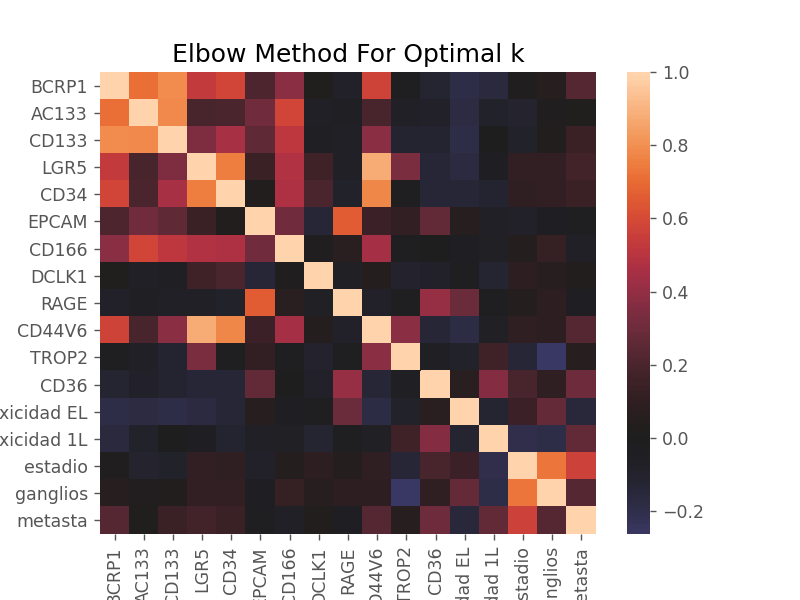

In [152]:
import matplotlib.pyplot as plt
data=df5
costs=[]
K=range(2, 10)
for k in K:
    untrained_model=KModes(n_clusters=k, n_init=10)
    trained_model=untrained_model.fit(data, categorical=[3, 4, 5])
    costs.append(trained_model.cost_)
plt.plot(K, costs, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [153]:
df5.dtypes

cluster      uint16
Resist      float64
Renov       float64
Adhes       float64
estadio       int64
ganglios      int64
metasta       int64
dtype: object

In [105]:
df5.head(10)

,cluster,Resist,Renov,Adhes,estadio,ganglios,metasta
5,0,1.000000,0.554762,0.062317,2,0,0
6,2,0.715580,0.486664,0.051710,4,1,1
7,3,0.894726,0.355828,0.012953,3,1,0
8,3,0.950081,0.519108,0.090875,3,1,0
9,2,0.886675,0.442608,0.045998,4,1,1
10,0,0.815217,0.376695,0.036513,1,0,0
11,2,0.743126,0.403241,0.031679,4,1,1
12,3,0.998088,1.000000,0.755658,3,1,0
13,3,0.998390,0.948216,1.000000,3,1,0
14,0,0.280797,0.058365,0.203270,2,1,0


In [154]:
df5.to_csv('FJD_clusters.csv')

['^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^', 'o', '.', '+', '^']
['b', 'r', 'k', 'k', 'r', 'b', 'r', 'k', 'k', 'b', 'k', 'k', 'k', 'r', 'b', 'g', 'b', 'k', 'k', 'r', 'k', 'b', 'k', 'k', 'k', 'k', 'g', 'k', 'g', 'b', 'b', 'k', 'g', 'k', 'b', 'b', 'k', 'g', 'g', 'k', 'g', 'k', 'b', 'k', 'b', 'k', 'b', 'k', 'b', 'r', 'k', 'k', 'b']


<IPython.core.display.Javascript object>


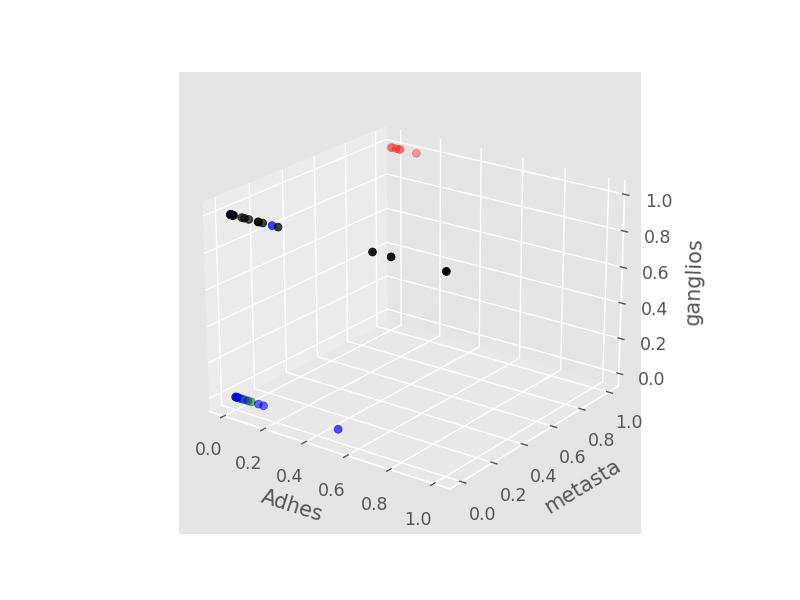

In [135]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d  

marker_list=[]
color_list=[]
markers={0:'^', 1:'o', 2:'.', 3:'+'}
colors = {0:'b', 1:'g', 2:'r', 3:'k'}
for i in range(len(df5)):
    marker_list.append(markers[i%4])
    color_list.append(colors[df5.iloc[i,0]])
print(marker_list)
print(color_list)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = df5['Adhes']
ys = df5['metasta']
zs = df5['ganglios']

ax.scatter3D(xs, ys, zs, c=color_list)
# for i, d in enumerate(fig.data):
#     fig.data[i].marker.symbol = symbols[fig.data[i].cluster]
# , marker=markers[df5['cluster'].tolist()], color=colors[df5['cluster'].tolist()]

ax.set_xlabel('Adhes')
ax.set_ylabel('metasta')
ax.set_zlabel('ganglios')

plt.show()

## Matriz de correlación entre variables

In [155]:
import seaborn as sn
import matplotlib.pyplot as plt


data = {'EDAD': list(df2['EDAD']),
        'oxal': list(df2['oxaliplatino']),
        'toxicidad': list(df2['toxi EL'])
        }
df0 = pd.DataFrame(data,columns=['EDAD','oxal','toxicidad'])


<IPython.core.display.Javascript object>


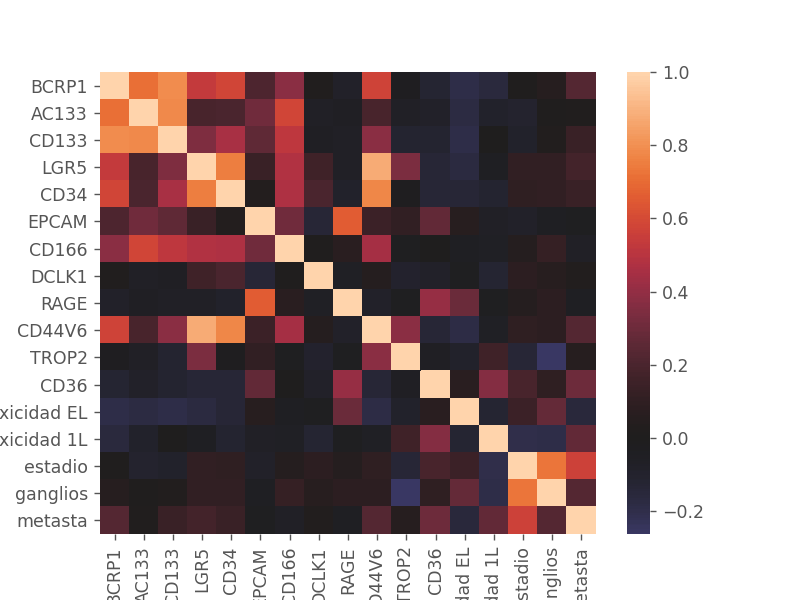

In [157]:
corrMatrix = df4.corr()
sn.heatmap(corrMatrix, annot=False, center=0)
plt.show()

##  Buscar variables que predigan metástasis 

In [50]:

#print(len(data))
nan_value = float("NaN")
df4=df3.copy()



In [54]:
cols = df4.columns
cols

Index(['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133',
       'porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_EPCAM',
       'porcentaje_CD166', 'porcentaje_DCLK1', 'porcentaje_RAGE',
       'porcentaje_CD44V6', 'porcentaje_TROP2', 'porcentaje_CD36',
       'toxicidad EL', 'toxicidad 1L', 'estadio', 'ganglios', 'metasta'],
      dtype='object')

In [58]:
df4.tail(20)

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_EPCAM,porcentaje_CD166,porcentaje_DCLK1,porcentaje_RAGE,porcentaje_CD44V6,porcentaje_TROP2,porcentaje_CD36,toxicidad EL,toxicidad 1L,estadio,ganglios,metasta
46,0.210,0.048,0.048,14.700,21.700,0.000,0.390,NaN,NaN,0.76,0.054,NaN,1.0,0.0,3.0,1.0,0.0
47,0.250,0.100,0.000,15.900,3.460,0.000,0.059,NaN,NaN,0.00,0.000,NaN,0.0,0.0,2.0,0.0,0.0
48,0.036,0.150,0.076,7.160,7.796,0.000,0.786,NaN,NaN,0.00,0.036,NaN,0.0,1.0,1.0,0.0,0.0
49,0.150,0.220,0.140,2.080,7.620,0.200,0.580,NaN,NaN,0.24,0.000,NaN,1.0,0.0,3.0,1.0,0.0
50,0.000,0.120,0.120,0.810,2.210,0.000,0.120,NaN,NaN,0.38,0.000,NaN,1.0,0.0,3.0,1.0,0.0
51,0.075,0.000,0.000,1.920,0.850,0.081,0.330,NaN,NaN,0.00,0.000,NaN,0.0,0.0,3.0,0.0,0.0
52,0.130,0.230,0.230,4.200,0.890,0.000,0.240,NaN,NaN,0.32,0.000,NaN,1.0,0.0,3.0,1.0,0.0
53,0.000,0.340,0.000,9.930,0.000,0.280,7.530,NaN,NaN,0.81,0.000,NaN,0.0,0.0,3.0,0.0,0.0
54,0.620,0.000,0.000,6.360,9.390,0.000,0.130,NaN,NaN,0.00,0.110,NaN,0.0,0.0,3.0,1.0,0.0
55,0.180,0.000,0.000,1.600,1.740,0.000,0.990,NaN,NaN,0.86,0.000,NaN,0.0,0.0,2.0,0.0,0.0


In [55]:
# cols=['AC133','CD133', 'BCRP1', 'EpCAM', 'SEMESTRE']
# df2 = df.copy()
for col in cols:
    print('col:',col)
    df4= clean_nonumber(df4,col)
###### REPETIR ESTO PARA TODAS LAS COLUMNAS

col: porcentaje_BCRP1
col: porcentaje_AC133
col: porcentaje_CD133
col: porcentaje_LGR5
col: porcentaje_CD34
col: porcentaje_EPCAM
col: porcentaje_CD166
col: porcentaje_DCLK1
col: porcentaje_RAGE
col: porcentaje_CD44V6
col: porcentaje_TROP2
col: porcentaje_CD36
col: toxicidad EL
r sin valores: 0
<class 'numpy.int64'>
col: toxicidad 1L
r sin valores: 0
<class 'numpy.int64'>
col: estadio
r sin valores: 0
<class 'numpy.int64'>
col: ganglios
r sin valores: 0
<class 'numpy.int64'>
col: metasta
r sin valores: 0
<class 'numpy.int64'>


In [57]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

# features = ['CD133', 'AC133','BCRP1','EpCAM']
features = cols
X = df4.get(key=features[:-1])
y = df4.get(key=['metasta'])
#y = np.ravel(df_rec.get(key=['REC']))
print(y)


from sklearn.model_selection import StratifiedShuffleSplit 

splitter=StratifiedShuffleSplit(n_splits=2,test_size=0.3, random_state=12) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X,df4['metasta']):     #this will splits the index
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = X.iloc[test]
    y_test_SS = y.iloc[test]
    #print('train:',y_train_SS.value_counts())  
    #print('test:',y_test_SS.value_counts())

print('total:',len(df4['metasta']))


    metasta
0       NaN
1       0.0
2       0.0
3       0.0
4       1.0
..      ...
61      0.0
62      1.0
63      0.0
64      0.0
65      0.0

[66 rows x 1 columns]


ValueError: Input y contains NaN.

In [ ]:
c99 = list(df2.columns).index('porcentaje_RAGE CD44V6')

for i in range(len(df2)):
    print(df2.iloc[i,c99])

##  Buscar variables que predigan recaída

In [ ]:
#print(len(data))
nan_value = float("NaN")
df=data2.copy()
df['CD133'] = nan_value  #en esta columna pongo el valor mayor entre CD133_APC y CD133_PE
for r in df.index:
    #print(df['CD133_APC'][r])
    if np.isnan(df['CD133_APC'][r]) and np.isnan(df['CD133_PE'][r]):
        print('both NAN:', r)
        df.loc[r,'CD133']= nan_value
    elif (not np.isnan(df['CD133_APC'][r])) and (not np.isnan(df['CD133_PE'][r])):
        df.loc[r,'CD133']= max(df['CD133_APC'][r],df['CD133_PE'][r]).astype('float')
    elif not np.isnan(df['CD133_APC'][r]):
        df.loc[r,'CD133'] = df['CD133_APC'][r].astype('float')
    elif not np.isnan(df['CD133_PE'][r]):
        df.loc[r,'CD133'] = df['CD133_PE'][r].astype('float')
    else:
        print('index:',r,'valor:',df['CD133'][r])
        print('valor desconocido!!!!!!!')
    
df['AC133'] = nan_value
for r in df.index:
    #print(df['AC133_APC'][r])
    if np.isnan(df['AC133_APC'][r]) and np.isnan(df['AC133_PE'][r]):
        print('both NAN:', r)
        df.loc[r,'AC133']= nan_value
    elif (not np.isnan(df['AC133_APC'][r])) and (not np.isnan(df['AC133_PE'][r])):
        df.loc[r,'AC133']= max(df['AC133_APC'][r],df['AC133_PE'][r]).astype('float64')
    elif not np.isnan(df['AC133_APC'][r]):
        df.loc[r,'AC133'] = df['AC133_APC'][r].astype('float64')
    elif  not np.isnan(df['AC133_PE'][r]):
        df.loc[r,'AC133'] = df['AC133_PE'][r].astype('float64')
    else:
        print('index:',r,'valor:',df['AC133'][r])
        print('valor desconocido!!!!!!!!!!!!!')

#df['CD133']= df.apply(lambda row: max((row.CD133_APC if not np.isnan(row.CD133_APC)), (row.CD133_PE if not np.isnan(row.CD133_PE)), axis = 1)
#df['AC133']= df.apply(lambda row: max(row.AC133_APC, row.AC133_PE), axis = 1)
#df['BCRP1_sin']= pd.to_numeric(df['BCRP1'], errors='coerce').fillna(0)
#df['EpCAM_sin']=df.EpCAM.fillna(0)
#df['EDAD']=df.EDAD.fillna(50)
df.tail(25)
#df.corr()    

In [ ]:
print(df['CD133'])

In [ ]:
df['SEMESTRE']=(df['MESES']/6).astype(int)
df['SEMESTRE'][:15]

In [ ]:
df.info()

In [ ]:
cols=['AC133','CD133', 'BCRP1', 'EpCAM', 'SEMESTRE']
df2 = df.copy()
for col in cols:
    print('col:',col)
    df2= clean_nonumber(df2,col)
###### REPETIR ESTO PARA TODAS LAS COLUMNAS

In [ ]:
df2.tail(25)

In [ ]:
# QUITAR LAS FILAS QUE TENGAN ALGÚN NAN

In [ ]:
#print(df2.tail(10))
df3 = df2[cols].copy()
#print(df3.tail(15))
df_clean=df3.dropna(axis=0, how='any', inplace=False)
df_clean.tail(25)

In [ ]:
df_sem0 = df_clean[df_clean['SEMESTRE']==0]
print(len(df_sem0))
#df_sem0.head(20)

In [ ]:
df_sem1 = df_clean[df_clean['SEMESTRE']==1]
print(len(df_sem1))

In [ ]:
df_sem2 = df_clean[df_clean['SEMESTRE']==2]
print(len(df_sem2))

In [ ]:
df_sem3 = df_clean[df_clean['SEMESTRE']==3]
print(len(df_sem3))

In [ ]:
df_sem4 = df_clean[df_clean['SEMESTRE']==4]
print(len(df_sem4))

In [ ]:
df_sem40 = df_clean[df_clean['SEMESTRE']==40]
print(len(df_sem40))

In [ ]:
df_sem0.tail()

In [ ]:
#df['SEMESTRE']=(df['MESES']/6).astype(int)
#df_clean['AÑO']=(np.floor(df_clean['SEMESTRE']/2)).astype(int)
#df_clean = df_clean.drop(['AÑO'], axis=1)
#df_clean.astype({'AC133':'float64', 'CD133':'float64','BCRP1':'float64'}).dtypes
#df_clean.tail(15)
df_clean.info()
df_clean['AÑO']=np.floor(df_clean['SEMESTRE']/2.0)
df_clean['AÑO'][:15]

In [ ]:
#df_clean.drop('AÑO', axis=0)
#df_clean.index.drop('AÑO')
df_clean = df_clean.drop(labels='AÑO', axis=0)

df_clean.tail()

In [ ]:
print(len(df_clean[df_clean['AÑO']==0]))

### Creo un nuevo DF con sólo 3 grupos: recidiva dentro del año, posterior al año y NO-recidiva

In [ ]:
df_rec=df_clean.copy()


In [ ]:
conditions = [
    (df_rec['AÑO'] < 1),
    (df_rec['AÑO'] > 0) & (df_rec['AÑO'] <20),
    (df_rec['AÑO'] >=20) 
    ]

# create a list of the values we want to assign for each condition
values = ['REC0', 'REC1_20', 'NO_REC']

# create a new column and use np.select to assign values to it using our lists as arguments
df_rec['REC'] = np.select(conditions, values)
df_rec.tail(10)

In [ ]:
print(len(df_rec[df_rec['REC']=='REC0']))
print(len(df_rec[df_rec['REC']=='REC1_20']))
print(len(df_rec[df_rec['REC']=='NO_REC']))

In [ ]:
df_an0 = df_clean[df_clean['AÑO']==0]
print(len(df_an0))
#df_sem0.head(20)
df_an1 = df_clean[df_clean['AÑO']==1]
print(len(df_an1))
df_an20 = df_clean[df_clean['AÑO']==20]
print(df_an20.head())

In [ ]:
ax = plt.gca()
df_clean.plot.scatter(x='SEMESTRE', y='AC133',c='r', alpha=0.5, ax=ax)
df_clean.plot.scatter(x='SEMESTRE', y='CD133',c='c', alpha=0.5, ax=ax)
ax.axis([0,5,0,5])

In [ ]:
df_rec['SUMA']=df_rec.loc[:,'CD133']+df_rec.loc[:,'AC133']+df_rec.loc[:,'BCRP1']+df_rec.loc[:,'EpCAM']
df_rec.tail()

In [ ]:
df_rec.dtypes

In [ ]:
df_rec.tail(5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_rec.hist(figsize=(20,20))
plt.show()

In [ ]:
cor = df_rec.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)

In [ ]:
df_rec.SUMA.hist(by=df_rec.REC)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

X = df_rec.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
Y = np.ravel(df_rec.get(key=['REC']))
target = df_rec.get(key=['REC'])
#y = Y.astype('category')
##probar si es necesario cambiar de tipo

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=0)

### Hacer conjuntos "train" y "test" con la misma proporción de valores en columna "REC" (Recaída)

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

features = ['CD133', 'AC133','BCRP1','EpCAM']
X = df_rec.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
y = df_rec.get(key=['REC'])
#y = np.ravel(df_rec.get(key=['REC']))
print(y)


from sklearn.model_selection import StratifiedShuffleSplit 

splitter=StratifiedShuffleSplit(n_splits=2,test_size=0.3, random_state=12) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X,df_rec['REC']):     #this will splits the index
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = X.iloc[test]
    y_test_SS = y.iloc[test]
    #print('train:',y_train_SS.value_counts())  
    #print('test:',y_test_SS.value_counts())

print('total:',len(df_rec['REC']))


In [ ]:
from sklearn import metrics

#predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test_SS, predictions, labels=['REC0', 'REC1_20', 'NO_REC'])
print(cm)

# Componentes Principales

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler


In [ ]:
#X = df_sem0.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
features = ['CD133', 'AC133','BCRP1','EpCAM']  # Separating out the features
x = df_rec.loc[:, features].values# Separating out the target
y = df_rec.loc[:,['REC']].values
#print(type(x.shape))

In [ ]:
#scaler = StandardScaler().fit(X)
#X_scaled = scaler.transform(X)
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
pca.fit(x)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'], index= df_rec.index)
df_pca = pd.concat([principalDf, df_rec[['CD133','AC133','BCRP1','EpCAM','REC']]], axis = 1)
print(df_pca.tail(10))

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['REC0','REC1_20','NO_REC']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['REC'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
               , df_pca.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticReg =  LogisticRegression(solver='lbfgs')

logisticReg.fit(X_train_SS,y_train_SS)
predict = logisticReg.predict(X_test_SS)
print(predict)
print(y_test_SS)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem1.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem2.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem3.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem40.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'], index = df_sem40.index)
df_pca = pd.concat([principalDf, df_sem40[['CD133']], df_sem40[['SEMESTRE']]], axis = 1)
print(df_pca.head(10))

In [ ]:
print(X.shape)

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes([0.1, 0.1, 0.65, 0.65])
ax.scatter(X.loc[:, 'CD133'], X.loc[:, 'EpCAM'], alpha=.3, label='samples')
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature', xlim=[0,1], ylim=[0,1])
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)


### Voy por aquí

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

C = 5  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_train_fold, y_train_fold)
print('Accuracy: \n', svc.score(x_test_fold, y_test_fold))
pred = svc.predict(x_test_fold)
accuracy=accuracy_score(y_test_fold, pred, normalize = True)
print(accuracy)
print(y_test_fold,pred)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train_fold, y_train_fold)
pred = rbf_svc.predict(x_test_fold)
accuracy=accuracy_score(y_test_fold, pred, normalize = True)
print(accuracy)
print(pred)




In [ ]:

poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(trainX0, trainY0)
pred = poly_svc.predict(testX0)
accuracy=accuracy_score(testY0, pred, normalize = True)
print(accuracy)
print(pred)

lin_svc = svm.LinearSVC(C=C).fit(trainX0, trainY0)
pred2 = lin_svc.predict(testX0)
accuracy2=accuracy_score(testY0, pred2, normalize = True)
print(accuracy2)
print(pred)


Ahora pruebo distintos algoritmos de Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X = df.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
Y = df.get(key=['SEMESTRE'])
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)



In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainX, trainY)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

#print(X)

forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))
pred = forest.predict(testX)
#print(testX,pred)
#print(df.RECAE_bin[testX.index])



Ahora incluyendo la EDAD

In [ ]:
X1 = df.get(key=['EDAD','CD133_sin', 'AC133_sin','BCRP1_sin','EpCAM_sin'])
Y1 = df.get(key=['RECAE_bin'])
#print(X)
trainX1, testX1, trainY1, testY1 = train_test_split(X1, Y1, test_size = 0.3)
forest.fit(trainX1, trainY1)
print('Accuracy: \n', forest.score(testX1, testY1))
pred = forest.predict(testX1)

In [ ]:
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier()

X0 = df.get(key=['CD133_sin', 'AC133_sin','BCRP1_sin','EpCAM_sin'])
Y0 = df.get(key=['RECAE_0'])
trainX0, testX0, trainY0, testY0 = train_test_split( X0, Y0, test_size = 0.3)

forest.fit(trainX0, trainY0)
print('Accuracy: \n', forest.score(testX0, testY0))
pred0 = forest.predict(testX0)
print(testX0,pred0)

accuracy=accuracy_score(testY0, pred0, normalize = True)
print(accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX,trainY)
print('Accuracy: \n', neigh.score(testX, testY))
pred = neigh.predict(testX)
print(testX,pred)
print(df.RECAE_bin[testX.index])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainnYdata['Name'])

# Predicted class
print(neigh.predict(test))


In [ ]:
print(len(data))
datos=data.copy()
df=pd.DataFrame(datos)
#df['CD133_sin']=np.float64(df['CD133_sin'])
#df['EpCAM']=np.float64(df['EpCAM'])
df['RECAE_t']=pd.to_numeric(df['MESES_calculo'], errors='coerce').fillna(99999, downcast='infer')
print(df['RECAE_t'])
df['RECAE_bin']=df['RECAE_t'].lt(99999)
print(df['RECAE_bin'])
df['RECAE_0']=1.0*df['RECAE_bin']
print(df.RECAE_0)

In [ ]:
# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)


In [ ]:
# Defining our KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5



In [ ]:
# Creating a dummy testset
testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

In [ ]:
#### Start of STEP 2
# Setting number of neighbors = 1
k = 5
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print(result)

In [ ]:
print(neigh)

# Ahora con Scikit-learn

In [ ]:
# 3 nearest neighbors
print(neigh.kneighbors(test)[1])

Ahora con Arból de decisión

In [ ]:
from sklearn import tree

from sklearn.cross_validation import train_test_split
decision = tree.DecisionTreeClassifier(criterion="gini")

decision.fit(trainX, trainY)
print("Accuracy: \n", decision.score(testX, testY))

